In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Ad_click_dataset.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Get summary statistics
summary_stats = df.describe()

missing_values, summary_stats

(Daily Time Spent on Site    0
 Age                         0
 Area Income                 0
 Daily Internet Usage        0
 Ad Topic Line               0
 City                        0
 Gender                      0
 Country                     0
 Timestamp                   0
 Clicked on Ad               0
 dtype: int64,
        Daily Time Spent on Site           Age   Area Income  \
 count              10000.000000  10000.000000  10000.000000   
 mean                  61.660757     35.940100  53840.047721   
 std                   15.704142      8.572973  13343.708718   
 min                   32.600000     19.000000  13996.500000   
 25%                   48.860000     29.000000  44052.302500   
 50%                   59.590000     35.000000  56180.930000   
 75%                   76.580000     42.000000  61840.260000   
 max                   90.970000     60.000000  79332.330000   
 
        Daily Internet Usage  Clicked on Ad  
 count          10000.000000   10000.000000  
 mean

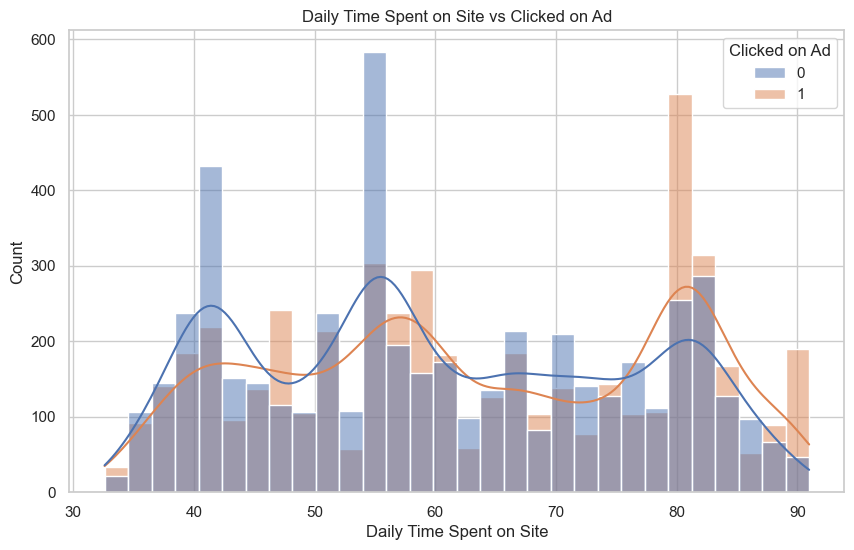

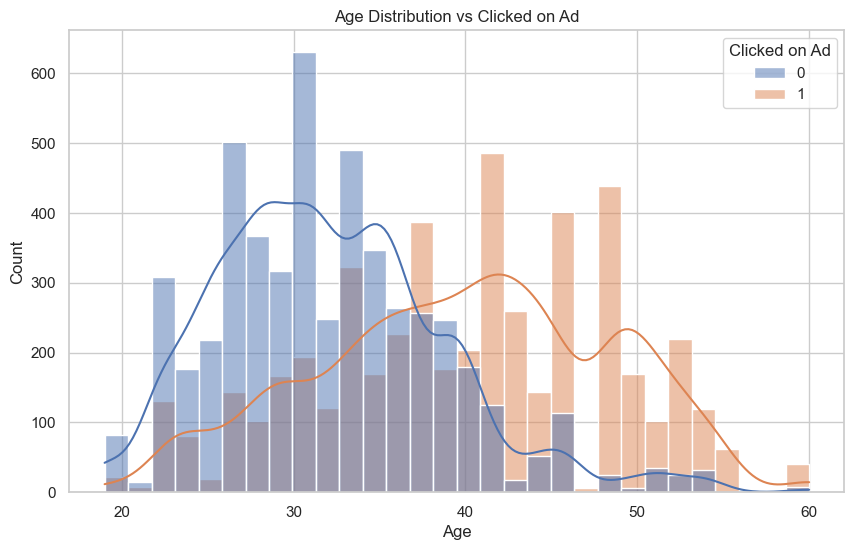

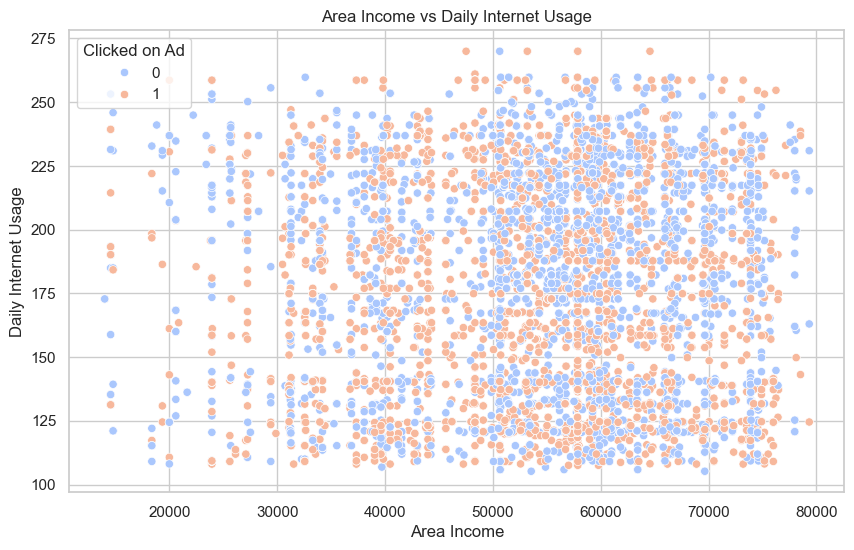

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Plot: Distribution of Daily Time Spent on Site for Clicked vs Not Clicked
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Daily Time Spent on Site', hue='Clicked on Ad', kde=True, bins=30)
plt.title('Daily Time Spent on Site vs Clicked on Ad')
plt.show()

# Plot: Distribution of Age for Clicked vs Not Clicked
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Clicked on Ad', kde=True, bins=30)
plt.title('Age Distribution vs Clicked on Ad')
plt.show()

# Plot: Area Income vs Daily Internet Usage (Colored by Clicked on Ad)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area Income', y='Daily Internet Usage', hue='Clicked on Ad', palette='coolwarm')
plt.title('Area Income vs Daily Internet Usage')
plt.show()

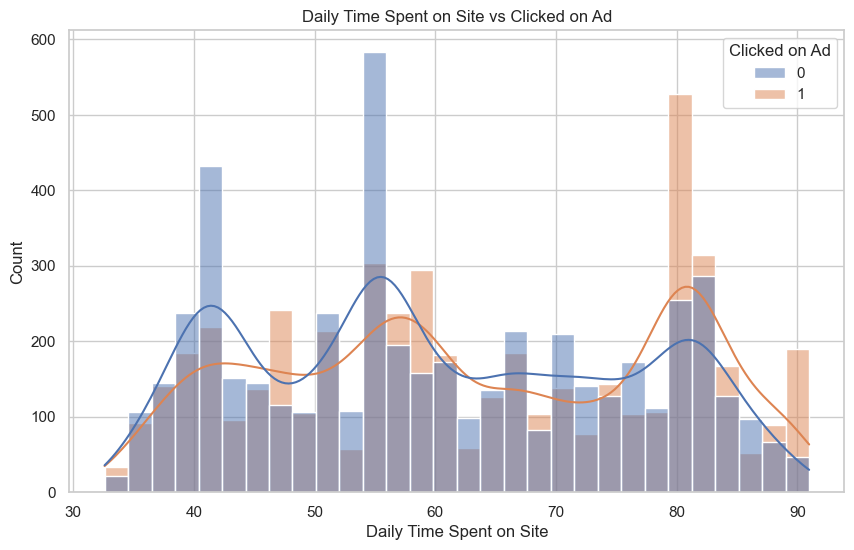

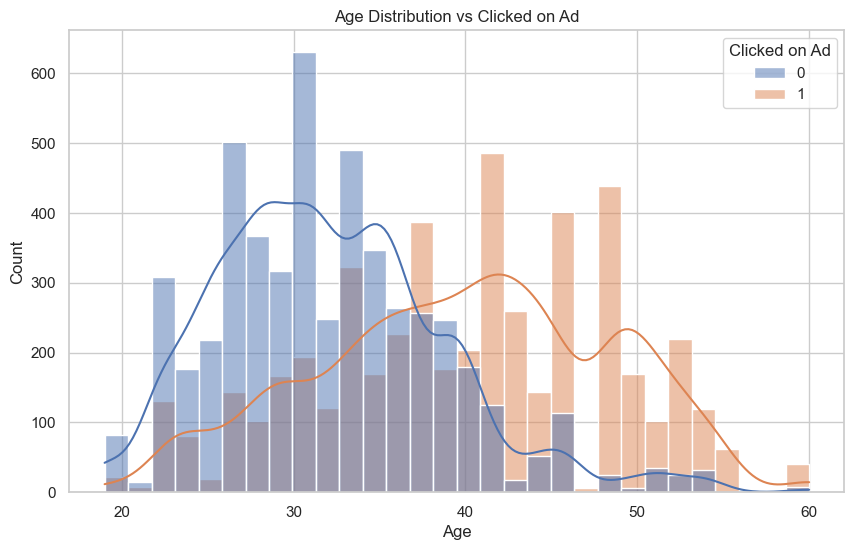

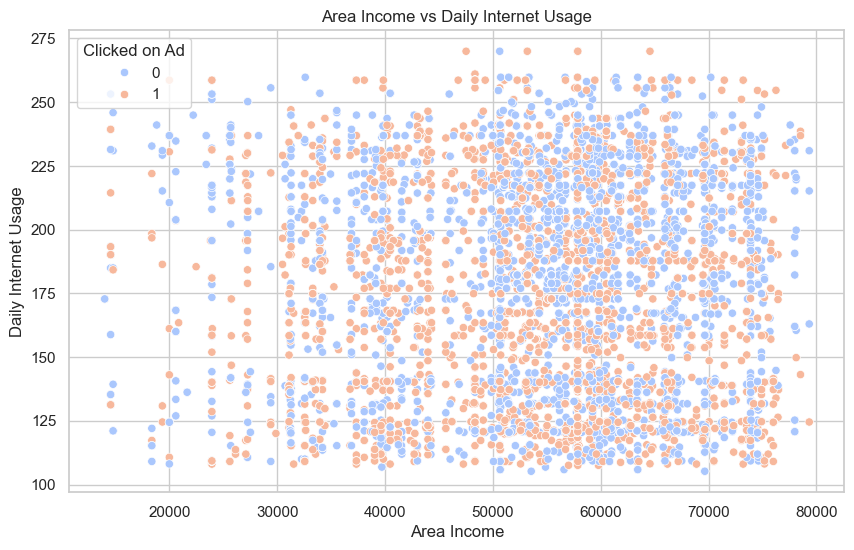

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Plot: Distribution of Daily Time Spent on Site for Clicked vs Not Clicked
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Daily Time Spent on Site', hue='Clicked on Ad', kde=True, bins=30)
plt.title('Daily Time Spent on Site vs Clicked on Ad')
plt.show()

# Plot: Distribution of Age for Clicked vs Not Clicked
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Clicked on Ad', kde=True, bins=30)
plt.title('Age Distribution vs Clicked on Ad')
plt.show()

# Plot: Area Income vs Daily Internet Usage (Colored by Clicked on Ad)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area Income', y='Daily Internet Usage', hue='Clicked on Ad', palette='coolwarm')
plt.title('Area Income vs Daily Internet Usage')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical features like Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Extract hour, day, and month from Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

# Drop unnecessary columns
df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

# Define features and target variable
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1543
           1       0.83      0.80      0.82      1457

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000

Accuracy: 0.8263333333333334


In [8]:
import pickle

# Save the trained model
with open('ctr_model.sav', 'wb') as file:
    pickle.dump(model, file)

In [10]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Hour,Day,Month
5775,83.97,41.0,57846.68,187.76,1,1,23,31,5
9826,44.73,36.0,32549.95,109.07,1,1,4,27,4
7381,36.98,24.0,50055.33,137.63,1,1,16,14,2
4699,40.01,41.0,57846.68,234.26,1,1,23,31,5
5966,41.73,31.0,52011.00,207.17,0,0,14,21,6
9342,83.71,42.0,57868.44,243.61,1,1,11,6,4
640,60.53,41.0,63363.04,168.92,1,0,11,13,5
4727,59.05,44.0,48335.20,137.24,0,1,20,19,2
2205,81.75,49.0,45632.51,168.34,0,1,4,2,3
5798,54.08,36.0,59240.24,140.46,0,0,19,26,2
